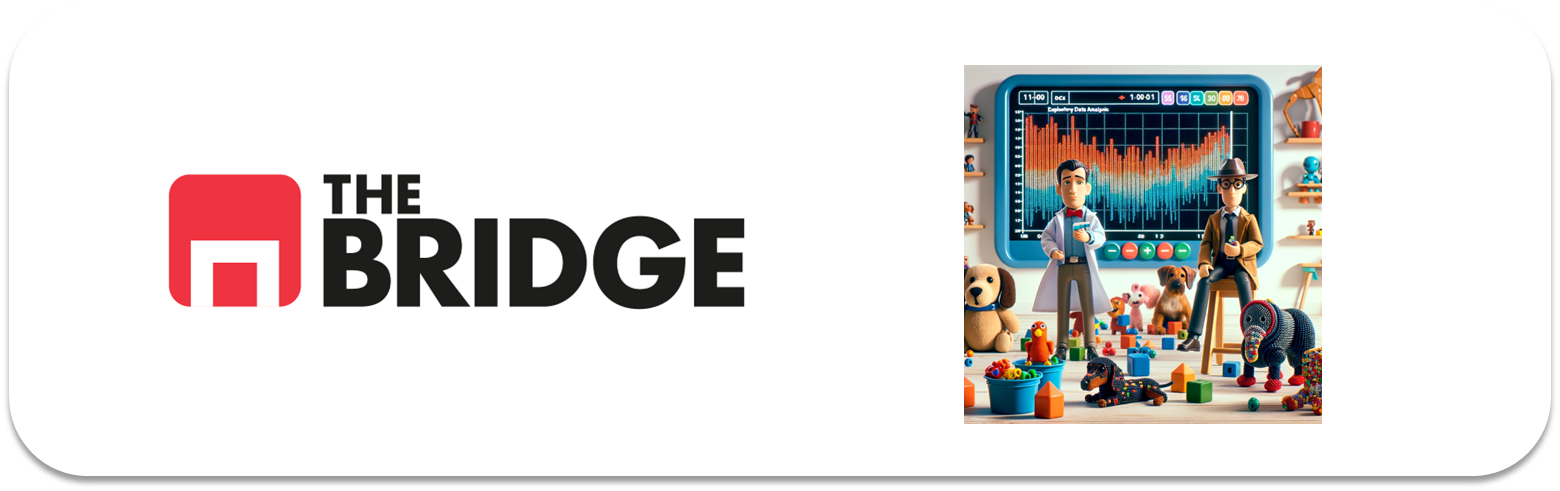

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bootcampviztools import *
from scipy.stats import chi2_contingency, mannwhitneyu

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic = df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"])

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic = df_titanic.drop(columns=["parch","sibsp"])
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [6]:
moda = df_titanic["embark_town"].mode()[0]
df_titanic["embark_town"].fillna(moda, inplace=True)

C:\Users\usuar\AppData\Local\Temp\ipykernel_2996\2250514913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["embark_town"].fillna(moda, inplace=True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
media_edad = round(df_titanic["age"].mean())
df_titanic["age"].fillna(media_edad, inplace=True)

C:\Users\usuar\AppData\Local\Temp\ipykernel_2996\1010511567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["age"].fillna(media_edad, inplace=True)


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

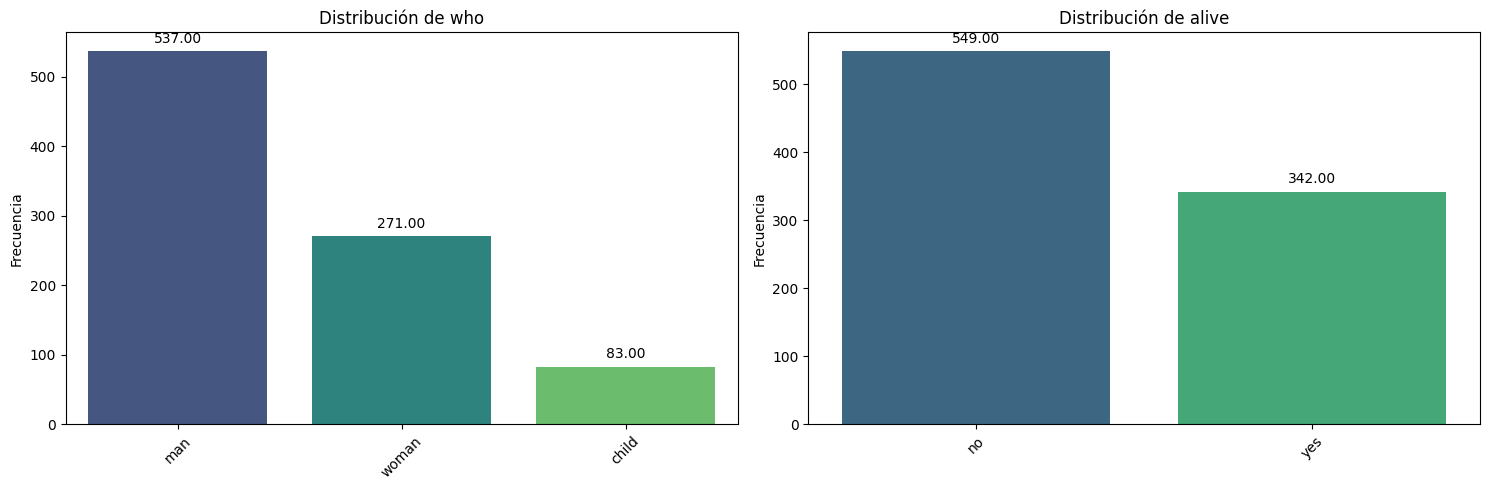

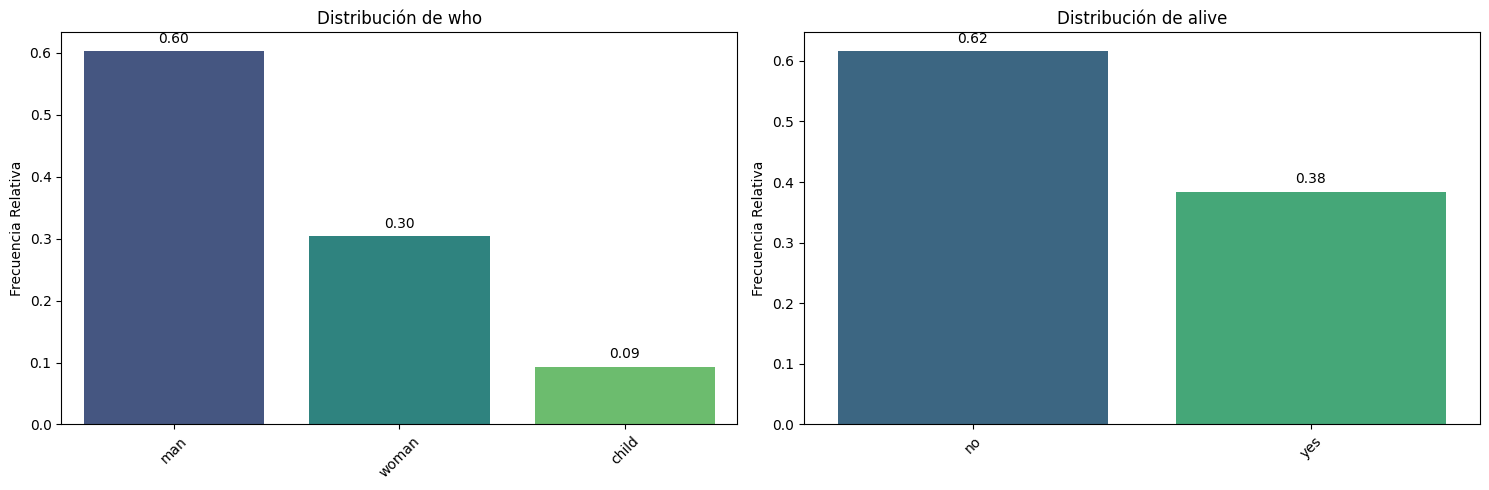

In [8]:
pinta_distribucion_categoricas(df_titanic, ["who","alive"], mostrar_valores=True)
pinta_distribucion_categoricas(df_titanic, ["who","alive"], mostrar_valores=True ,relativa=True)

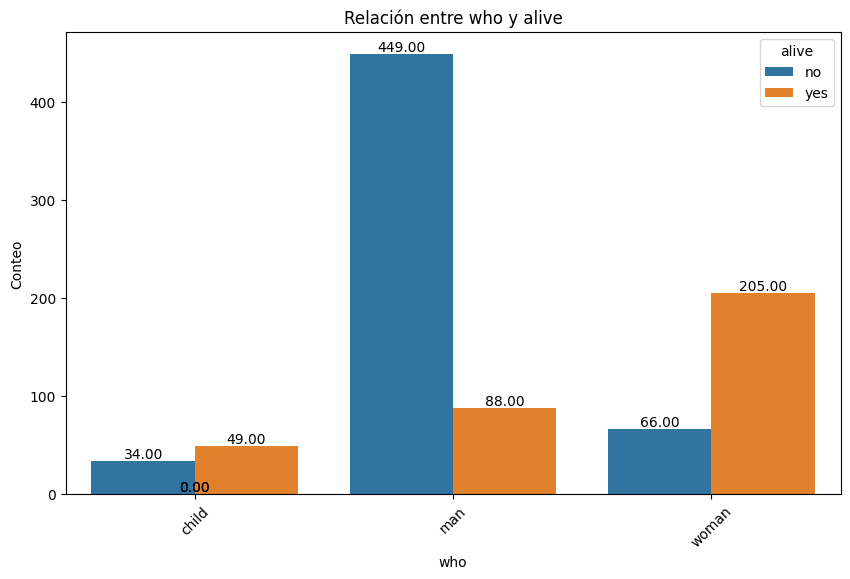

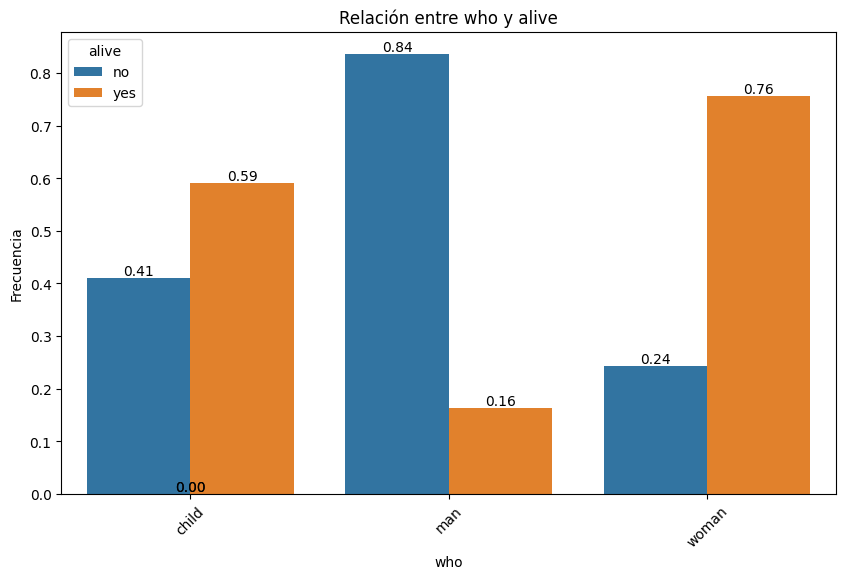

In [9]:
plot_categorical_relationship_fin(df_titanic,"who","alive", show_values=True)
plot_categorical_relationship_fin(df_titanic,"who","alive", relative_freq=True, show_values=True)

El grupo que sobrevivió más tanto de manera absoluta como relativa fue `woman`, con un total de 205 (76%). El grupo con la mayor cantidad de muertes fue `man` con un total de 449 (84%).

Tabla de contigencia para ver la relación que hay entre `who` y `alive`.

In [10]:
tabla_contigencia = pd.crosstab(df_titanic["alive"], df_titanic["who"])
tabla_contigencia

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [11]:
chi2, p, dof, expected = chi2_contingency(tabla_contigencia) #desempaquetado
print("Chi-Cuadrado:", chi2)
print("P-value:", p)
print("Grados de libertad:", dof)
print("Tabla de frecuencias esperadas:\n", expected)

Chi-Cuadrado: 283.923050324233
P-value: 2.2227620817798914e-62
Grados de libertad: 2
Tabla de frecuencias esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


Tenemos un `p-value` inferior a 0.05 por lo que rechazamos la hipótesis nula y podemos decir que hay una dependencia entre el el tipo de `pasajero` y si sobrevivió o no.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

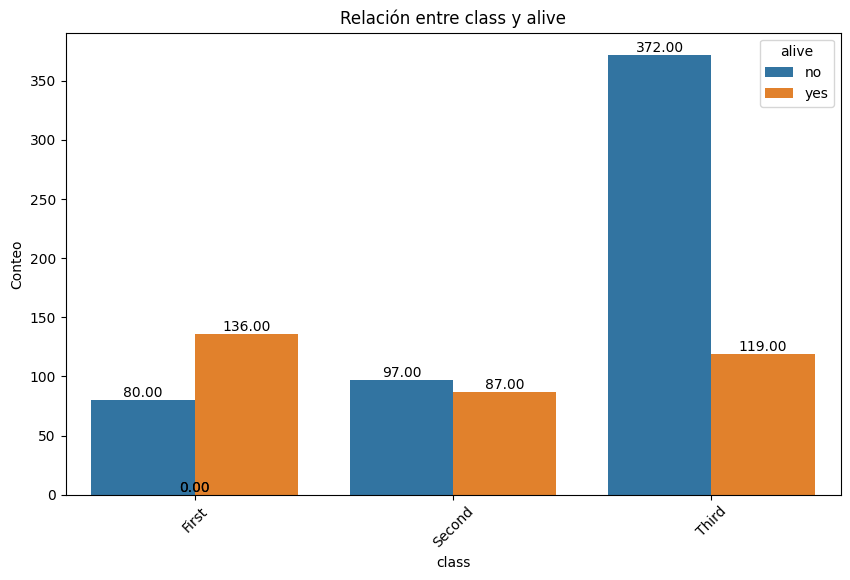

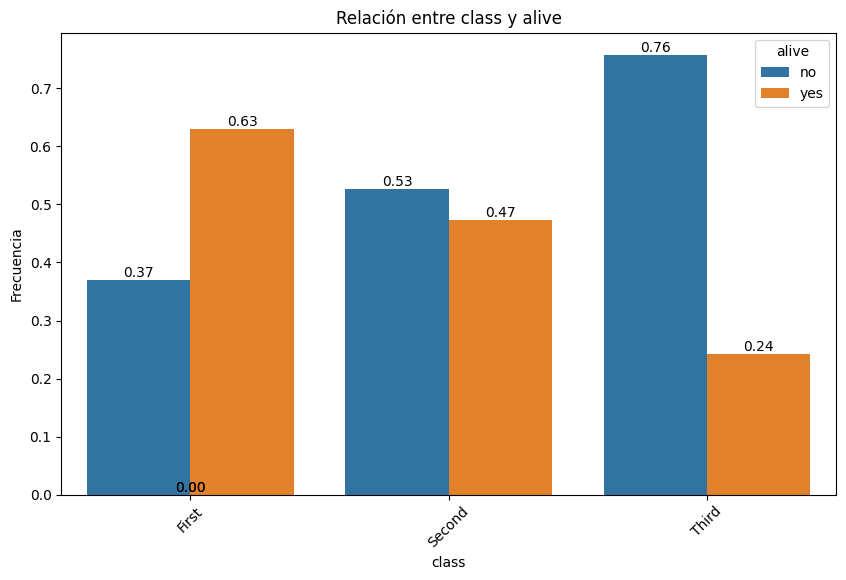

In [12]:
plot_categorical_relationship_fin(df_titanic, "class", "alive", show_values=True)
plot_categorical_relationship_fin(df_titanic, "class", "alive", show_values=True, relative_freq=True)

In [13]:
tabla_contigencia = pd.crosstab(df_titanic["alive"], df_titanic["class"])
chi2, p, dof, expected = chi2_contingency(tabla_contigencia) #desempaquetado
print("Chi-Cuadrado:", chi2)
print("P-value:", p)
print("Grados de libertad:", dof)
print("Tabla de frecuencias esperadas:\n", expected)

Chi-Cuadrado: 102.88898875696056
P-value: 4.549251711298793e-23
Grados de libertad: 2
Tabla de frecuencias esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


Obtenemos un `p-value` inferior a 0.05 por lo que podemos afirmar que hay una relación estadística significativa entre la clase de una persona y si sobrevivió o no.

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?


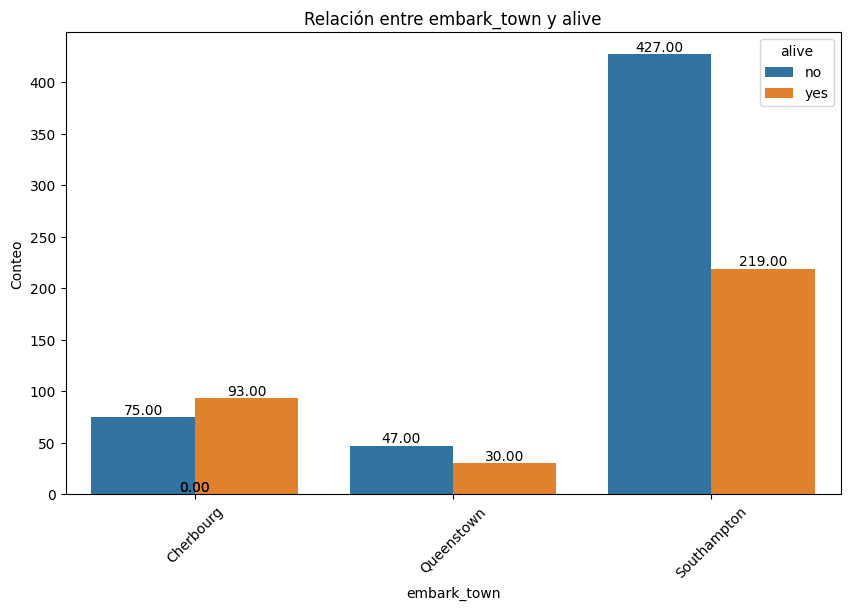

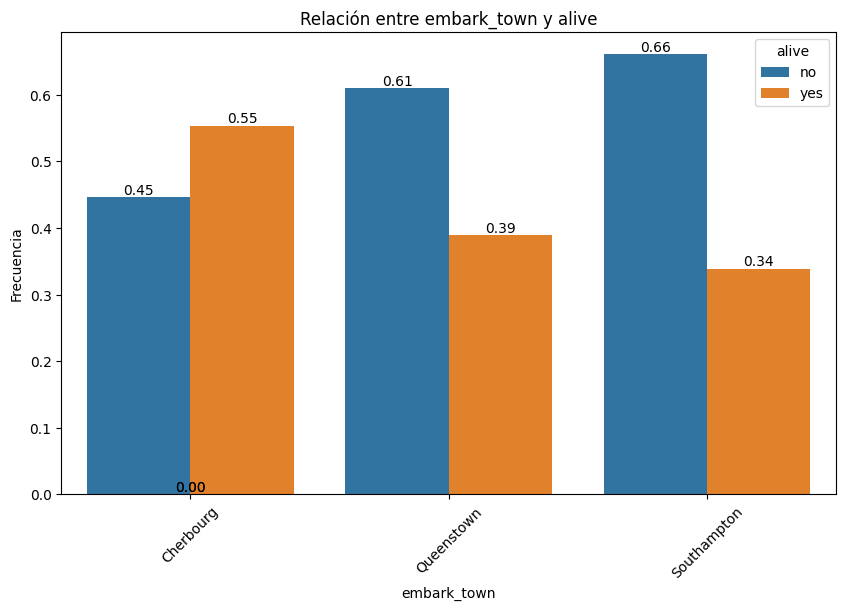

In [14]:
plot_categorical_relationship_fin(df_titanic, "embark_town", "alive", show_values=True)
plot_categorical_relationship_fin(df_titanic, "embark_town", "alive", show_values=True, relative_freq=True)

In [15]:
tabla_contigencia = pd.crosstab(df_titanic["alive"], df_titanic["embark_town"])
chi2, p, dof, expected = chi2_contingency(tabla_contigencia) #desempaquetado
print("Chi-Cuadrado:", chi2)
print("P-value:", p)
print("Grados de libertad:", dof)
print("Tabla de frecuencias esperadas:\n", expected)

Chi-Cuadrado: 25.964452881874784
P-value: 2.3008626481449577e-06
Grados de libertad: 2
Tabla de frecuencias esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


Obtenemos un `p-value` inferior a 0.05 por lo que podemos afirmar que hay una relación estadística significativa entre la ciudad de embarque del pasajero y si sobrevivió o no.

Sería interesante analizar si la ciudad de embarque afectó realmente a la supervivencia, puede que todos los que embarcaron en `Cherbourg` fueran a primera clase y por eso puedieron sobrevivir más en comparación al resto de ciudades.

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


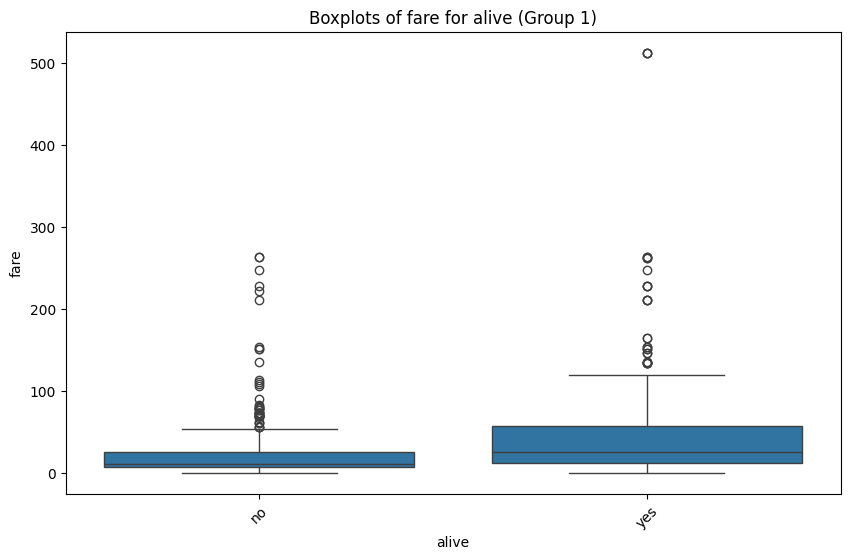

In [16]:
plot_grouped_boxplots(df_titanic, "alive", "fare")

In [17]:
# UMann-Whitney
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

ustat, p_value = mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", ustat)
print("P-value:", p_value)

Estadístico U: 129951.5
P-value: 4.553477179250237e-22


Obtenemos un `p-value` inferior a 0.05 por lo que podemos decir que hay una relación significativa estadística entre `fare` y `alive`

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?


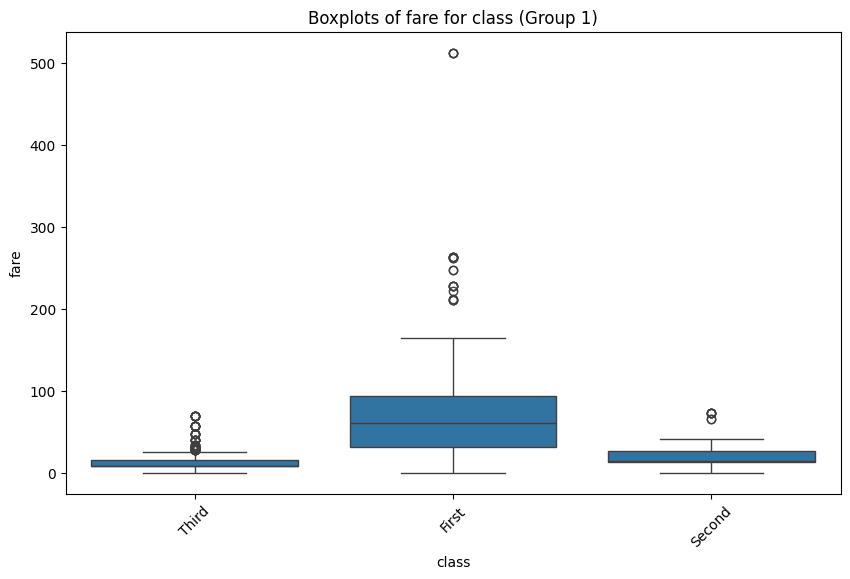

In [18]:
plot_grouped_boxplots(df_titanic, "class", "fare")

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.


In [19]:
def analisis_trivariante(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor ,[col_2,col_1]]
    
    for valor, df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_histograms(df_datos, col_1, col_2, group_size = group_size, bins = bins)

analisis_trivariante(df_titanic, "embark_town", "alive", "fare", 2, 30)

Respuesta Southampton:


TypeError: plot_grouped_histograms() got an unexpected keyword argument 'bins'

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

(2,)


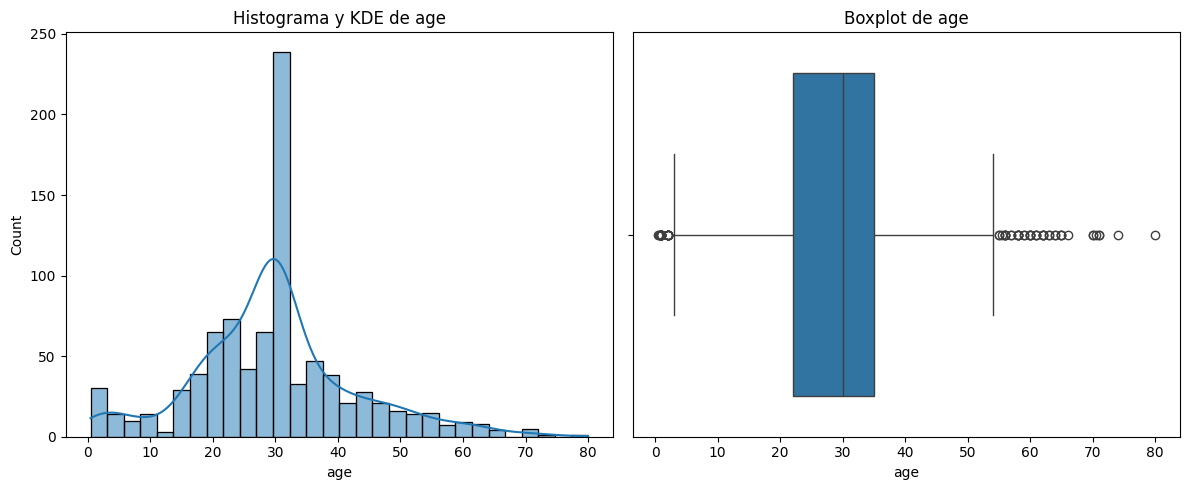

In [20]:
plot_combined_graphs(df_titanic, ["age"])

In [21]:
bins = [0,22,32,35,80]
df_titanic["cat_age"] = pd.cut(df_titanic["age"], bins = bins, labels= ["age_1", "age_2", "age_3", "age_4"])

In [23]:
def analisis_tricategorico(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor, [col_2,col_1]]

    for valor, df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos, col_2, col_1, relative_freq= relativa, show_values= muestra_valores)

Respuesta age_1:


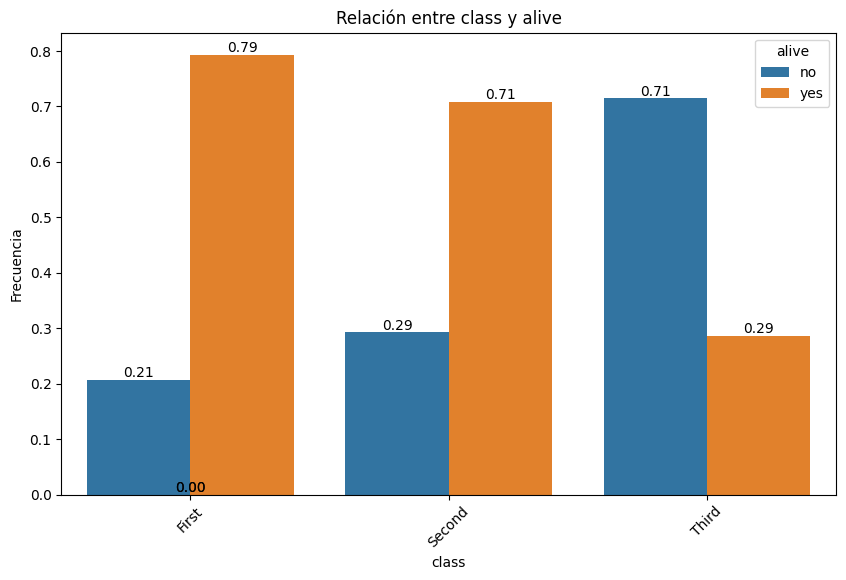

Respuesta age_4:


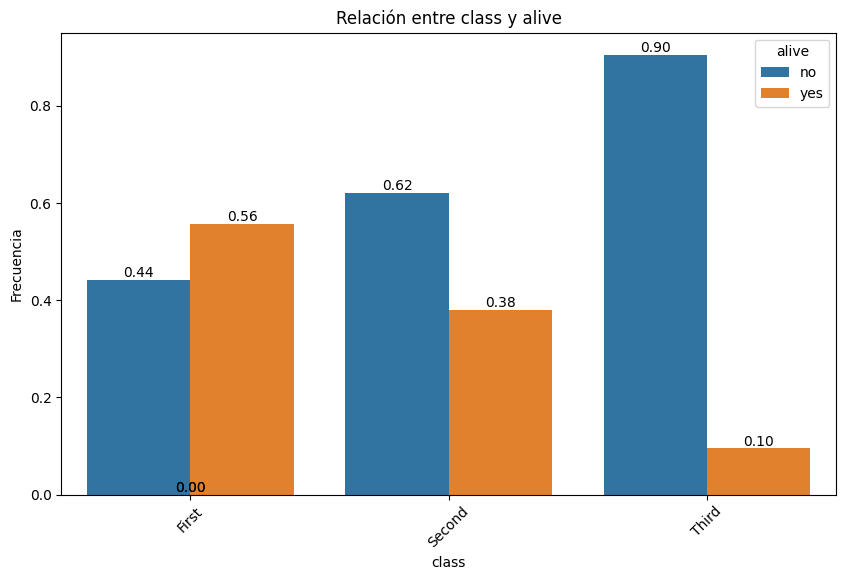

Respuesta age_2:


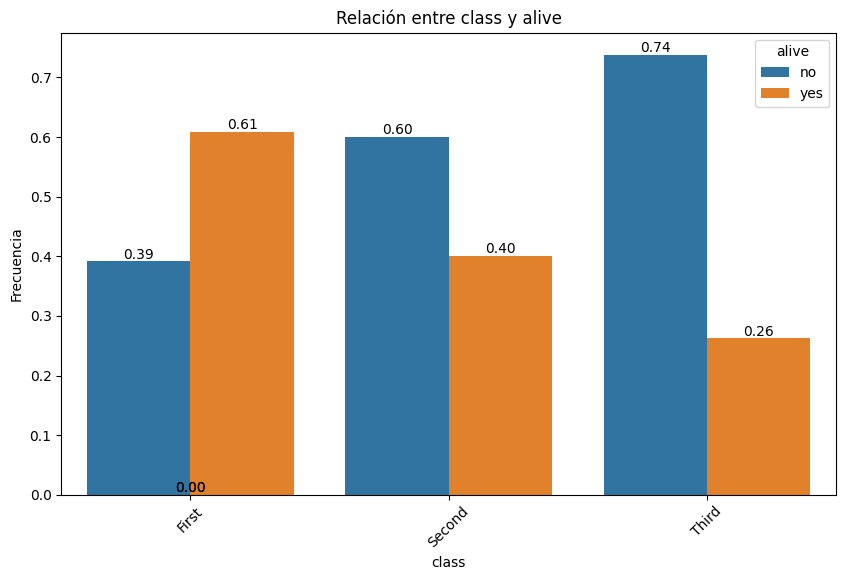

Respuesta age_3:


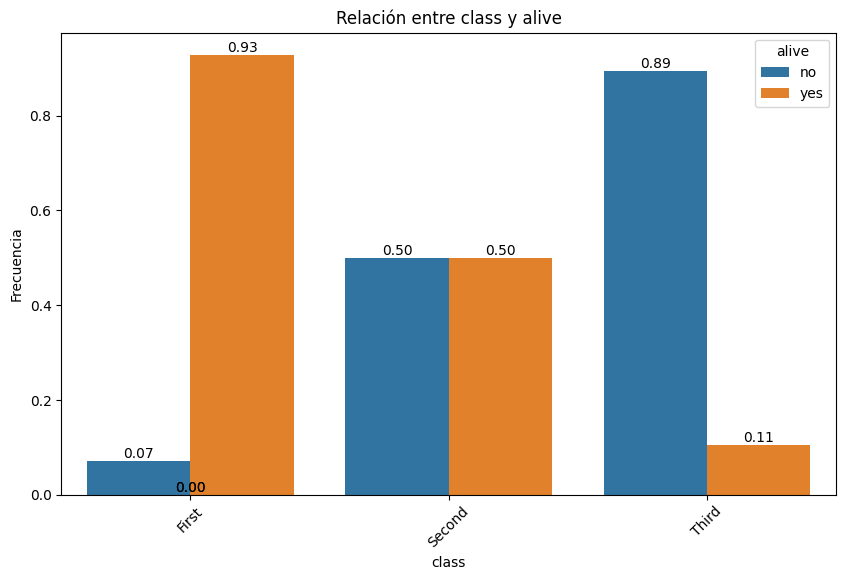

In [24]:
analisis_tricategorico(df = df_titanic, directora= "cat_age", otras = ["alive","class"], relativa=True, muestra_valores=True)

En términos relativos podemos observar que el grupo `age_3` y `First` es el que mejor ratio de supervivencia tiene, mientras que el peor es el `age_3` y `age_4` en `Third`

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

Respuesta no:


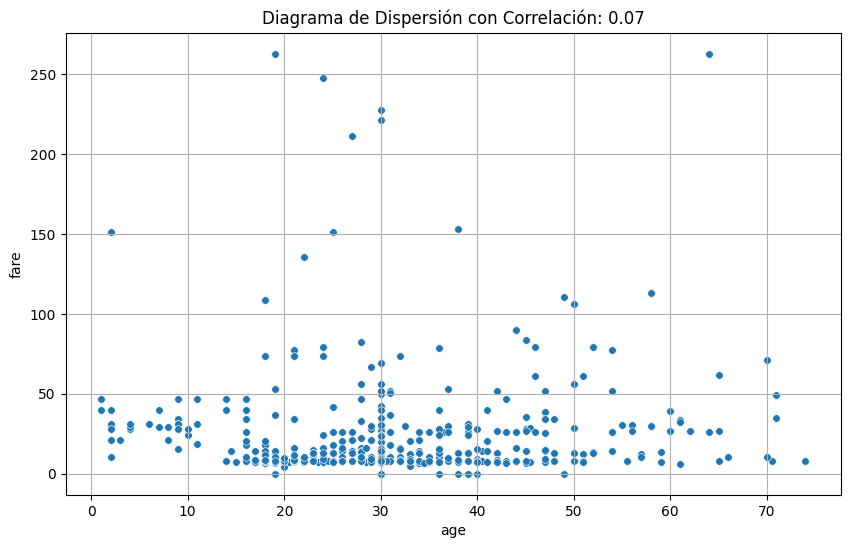

Respuesta yes:


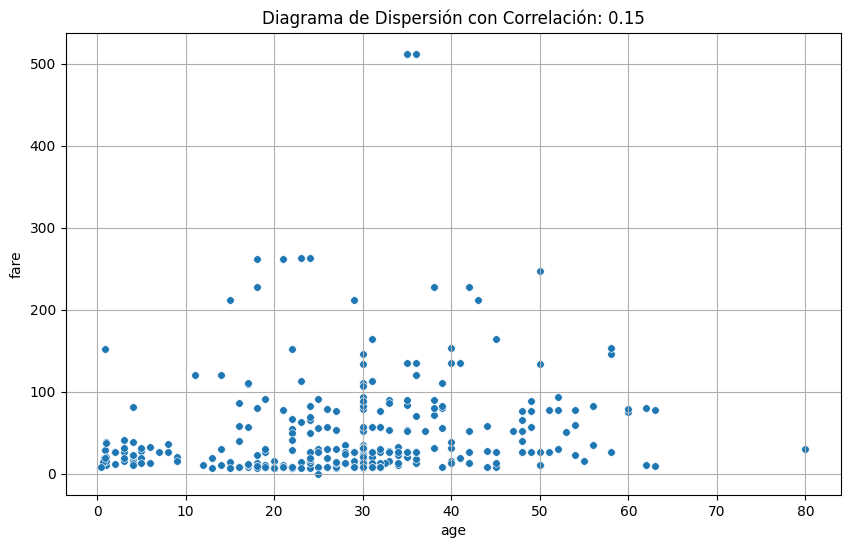

In [25]:
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor, [col_2,col_1]]

for valor, df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos, col_2, col_1, tamano_puntos= 30, mostrar_correlacion=True)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [26]:
df_viajes_junio = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_viajes_junio.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

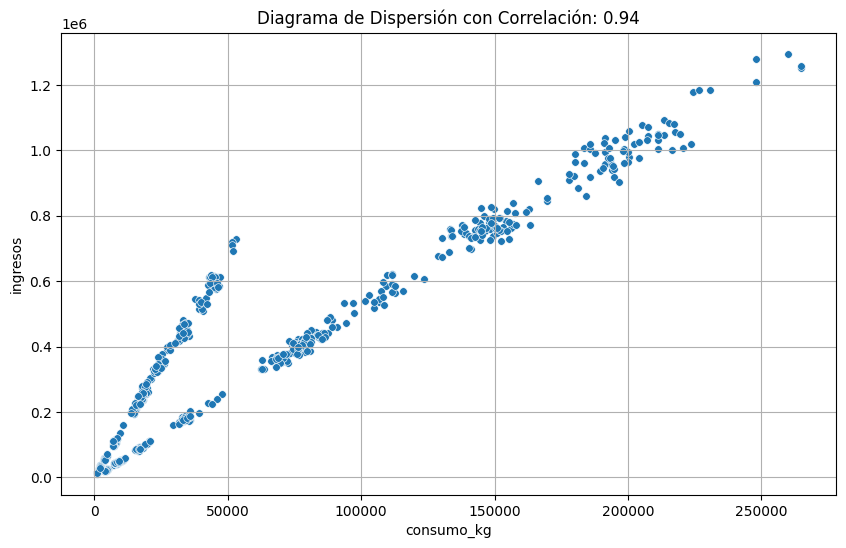

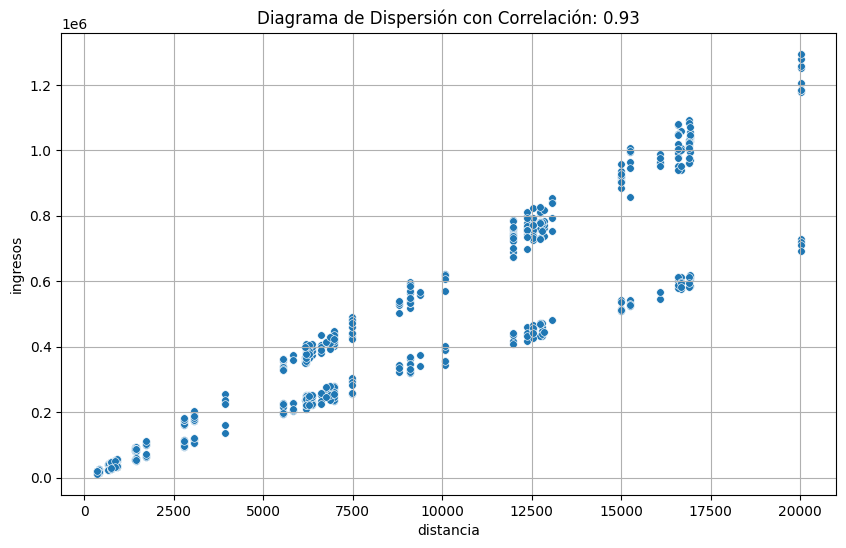

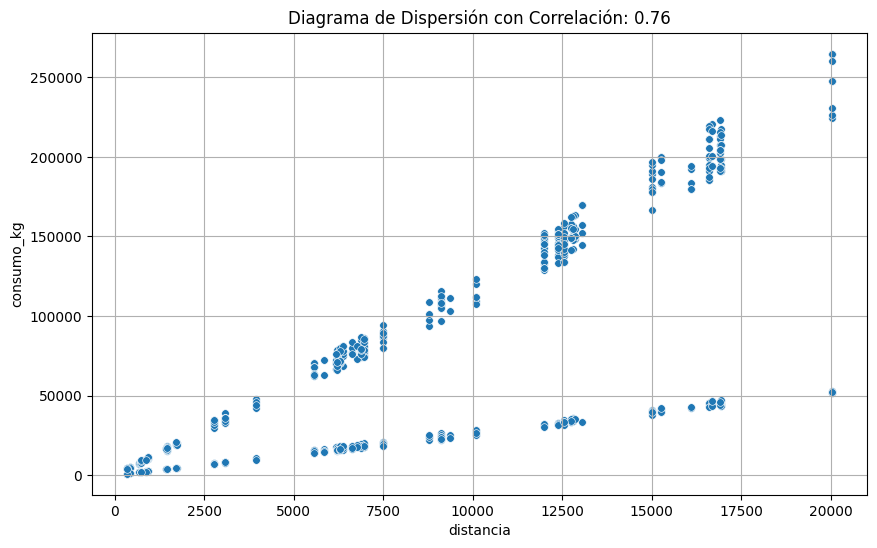

In [27]:
grafico_dispersion_con_correlacion(df_viajes_junio,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(df_viajes_junio,"distancia", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(df_viajes_junio,"distancia", "consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

Se puede observar que todas las variables guardan una correlación entre ellas a nivel visual. Sería interesante analizar si las líneas que tienen una mayor pendiente se debe a que `distancia` es menor y por eso son más eficientes.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [28]:
df_viajes_junio["distancia"].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [29]:
bins = [344,3073,6877,12553,20030] #20030 porque el valor más alto es 20029 y así no se deja fuera de rango.
labels = ["Muy corto", "Corto", "Medio", "Largo"]
df_viajes_junio["cat_vuelo"] = pd.cut(df_viajes_junio["distancia"], bins=bins, labels=labels,right=False)

Respuesta Muy corto:


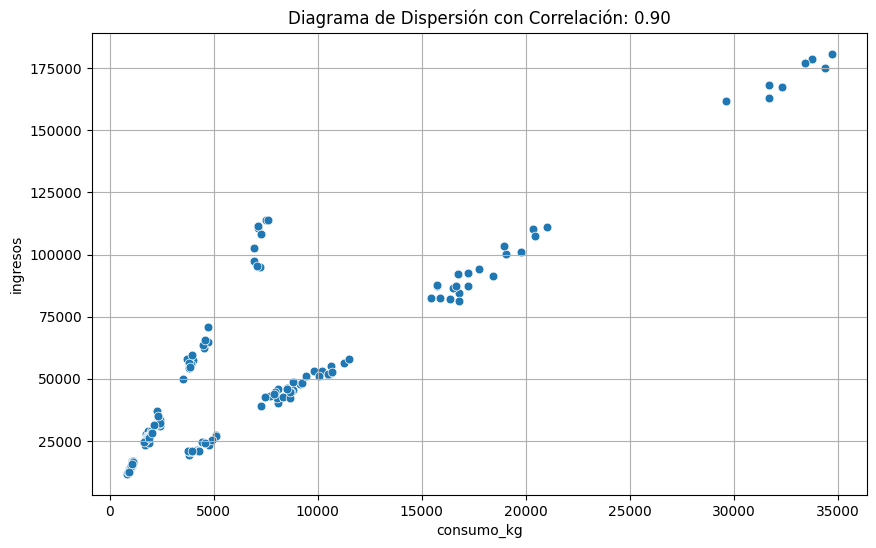

Respuesta Largo:


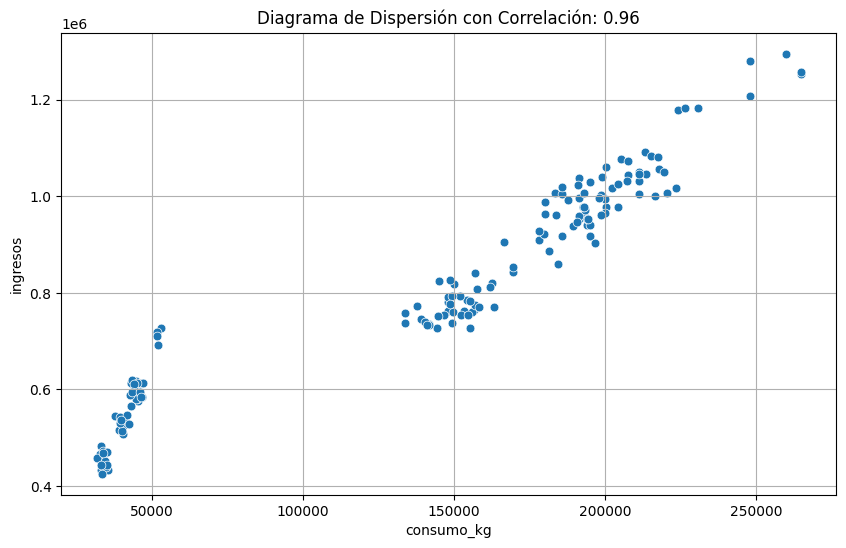

Respuesta Medio:


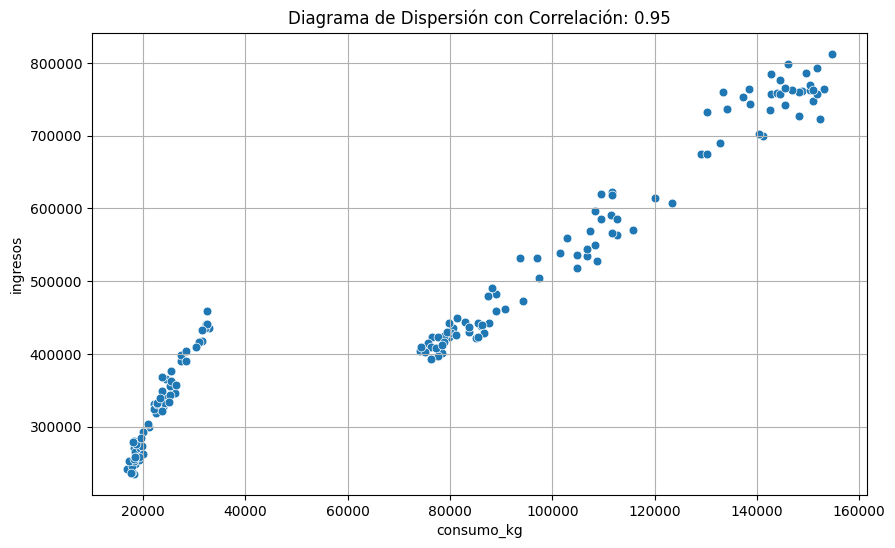

Respuesta Corto:


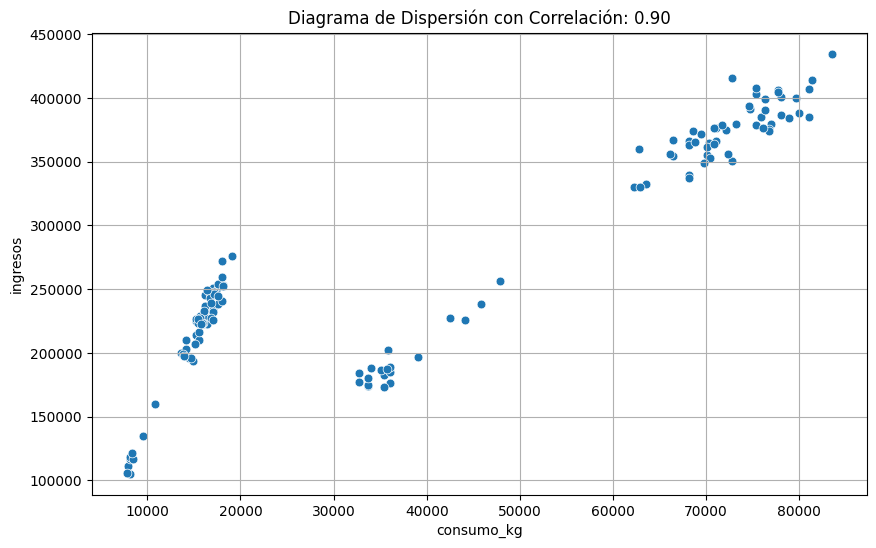

In [30]:
col_directora = "cat_vuelo"
col_1 = "ingresos"
col_2 = "consumo_kg"
diccionario_multivariante = {}
for valor in df_viajes_junio[col_directora].unique():
    diccionario_multivariante[valor] = df_viajes_junio.loc[df_viajes_junio[col_directora] == valor,[col_2,col_1]]

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=40, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.